**LOAN STATUS PREDICTION**

***Loan status prediction is the process of using machine learning algorithms to predict the likelihood of a loan being repaid or defaulted based on historical data***

***Import Required Libraries***

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

***Loading Dataset***

In [4]:
data=pd.read_csv('loan data.txt')

***Data Basic information***

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.shape

(614, 13)

***Data Cleaning***

In [8]:
data.replace(',',np.nan,inplace=True)
data.replace('',np.nan,inplace=True)
data.replace('nan',np.nan,inplace=True)
data.replace('?',np.nan,inplace=True)


***Null Values***

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

***Remove Null values***

In [11]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())


In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Outliers Detection & Handling***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


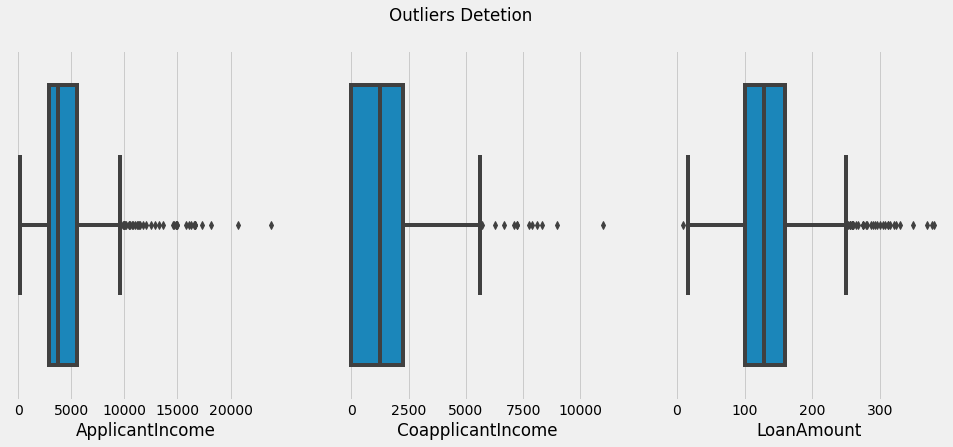

In [22]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.suptitle("Outliers Detetion")
plt.show()

In [ ]:
print("Before Removing the outliers", data.shape)

data = data[data['ApplicantIncome']<25000]

print("After Removing the outliers", data.shape)
print("Before Removing the outliers", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("After Removing the outliers", data.shape)
print("Before Removing the outliers", data.shape)

data = data[data['LoanAmount']<400]

print("After Removing the outliers", data.shape)

***Analysis***

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

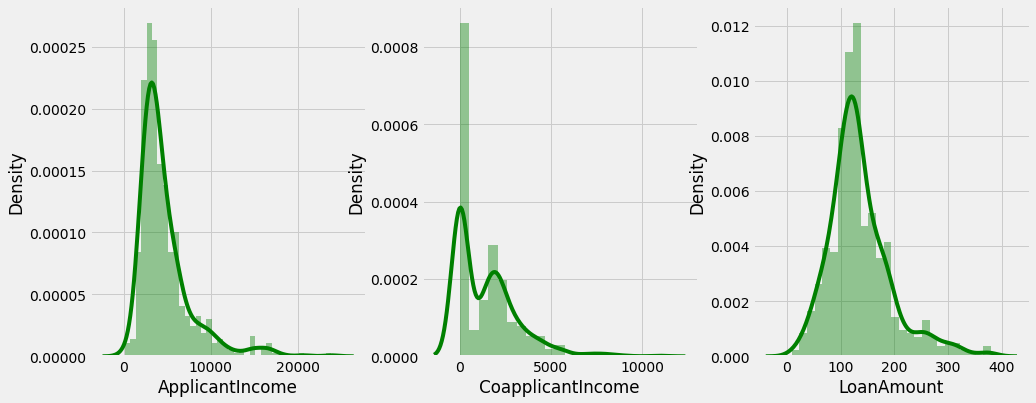

In [25]:
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')
plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='green')
plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

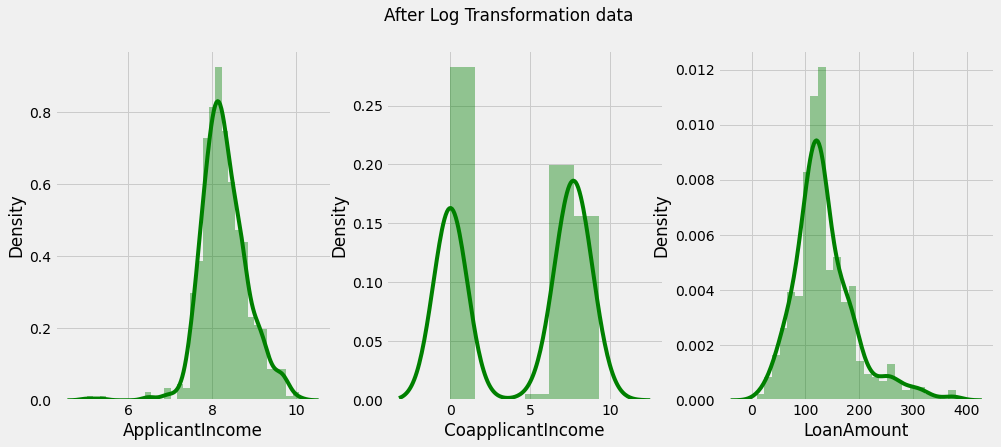

In [26]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')
plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='green')
plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')
plt.suptitle("After Log Transformation data")
plt.show()


In [28]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()


In [29]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [157]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

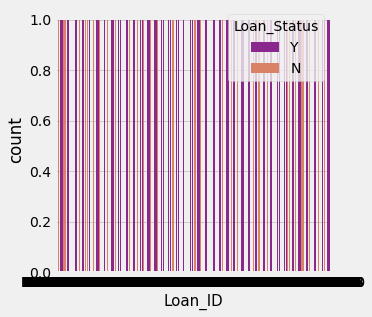

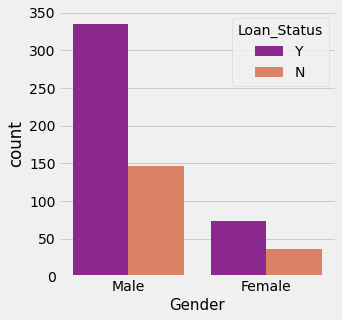

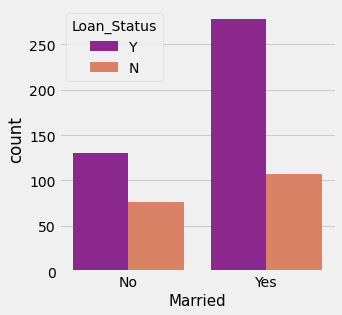

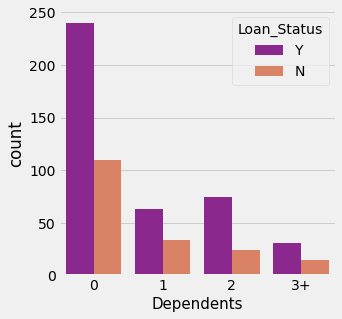

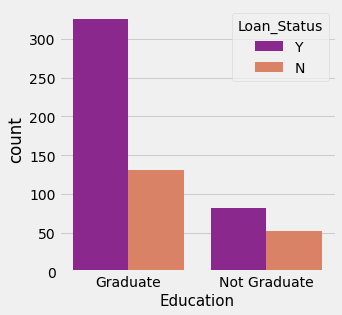

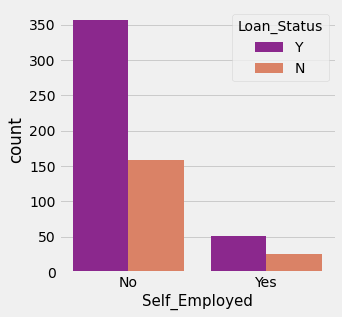

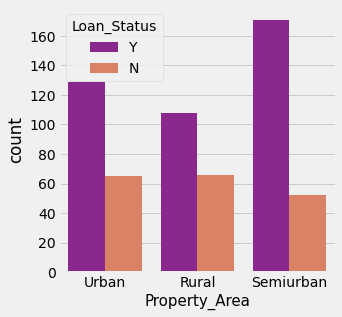

In [32]:
for i in cat[:-1]:
  plt.figure(figsize = (15,10))
  plt.subplot(2,3,1)
  sns.countplot(x = i, data = data ,hue = 'Loan_Status' , palette = 'plasma')
  plt.xlabel(i, fontsize = 15)


In [33]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
print(pd.crosstab(data['Loan_Status'],data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [35]:
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [36]:
print(pd.crosstab(data['Loan_Status'],data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [37]:
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [38]:
print(pd.crosstab(data['Loan_Status'],data['Credit_History']))

Credit_History  0.0  1.0
Loan_Status             
N                80  103
Y                 6  402


***Data Preparation***

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [40]:
data=data.drop(['Loan_ID'],axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [48]:
data['Dependents'].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [42]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
data['Gender'] = data['Gender'].replace(('Male','Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes','No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3+'),(1,0,0,0))

In [51]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,0,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,1,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,1,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,1,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [123]:
x=data.drop(['Loan_Status'],axis = 1)
y=data['Loan_Status']

In [111]:
x.shape

(591, 11)

In [112]:
y.shape

(591,)

***Handle Imbalance data***

In [135]:
x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

In [136]:
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


***Split Data***

In [138]:
x_train, x_test, y_train,y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [139]:
x_train.shape

(652, 11)

In [140]:
y_train.shape

(652,)

***Select the model***

In [141]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***Prediction***

In [142]:
y_pred=model.predict(x_test)

In [143]:
print("Training accuracy:",model.score(x_train,y_train))

Training accuracy: 0.7791411042944786


In [144]:
print("Testing accuracy:",model.score(x_test,y_test))

Testing accuracy: 0.8048780487804879


In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.78      0.84      0.81        82

    accuracy                           0.80       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.81      0.80      0.80       164



In [147]:
print("Accuracy score:",accuracy_score(y_pred,y_test))

Accuracy score: 0.8048780487804879


In [148]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,0,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,1,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,1,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,1,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


***Check Predictions with your input details***

In [155]:
model_pred = np.array([[1,0,1,1,1,8.67,12,128,360,1.0,1]])


In [172]:
prediction = model.predict(model_pred)
print(prediction[0])

1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [173]:
import pickle